## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9777615	total: 58.7ms	remaining: 58.6s
1:	learn: 0.9595566	total: 59.7ms	remaining: 29.8s
2:	learn: 0.9406186	total: 60.7ms	remaining: 20.2s
3:	learn: 0.9251764	total: 61.9ms	remaining: 15.4s
4:	learn: 0.9107530	total: 62.9ms	remaining: 12.5s
5:	learn: 0.8942826	total: 63.9ms	remaining: 10.6s
6:	learn: 0.8800561	total: 64.9ms	remaining: 9.21s
7:	learn: 0.8645316	total: 65.8ms	remaining: 8.16s
8:	learn: 0.8493010	total: 66.6ms	remaining: 7.34s
9:	learn: 0.8330163	total: 67.5ms	remaining: 6.68s
10:	learn: 0.8192595	total: 68.3ms	remaining: 6.14s
11:	learn: 0.8054722	total: 69.1ms	remaining: 5.69s
12:	learn: 0.7901328	total: 69.9ms	remaining: 5.31s
13:	learn: 0.7759432	total: 70.8ms	remaining: 4.99s
14:	learn: 0.7631521	total: 71.6ms	remaining: 4.7s
15:	learn: 0.7494040	total: 72.4ms	remaining: 4.45s
16:	learn: 0.7357454	total: 73.3ms	remaining: 4.24s
17:	learn: 0.7241187	total: 74ms	remaining: 4.04s
18:	learn: 0.7126839	total: 74.9ms	remaining: 3

59:	learn: 0.4304176	total: 109ms	remaining: 1.71s
60:	learn: 0.4264689	total: 110ms	remaining: 1.7s
61:	learn: 0.4218895	total: 111ms	remaining: 1.68s
62:	learn: 0.4171852	total: 112ms	remaining: 1.66s
63:	learn: 0.4133759	total: 113ms	remaining: 1.65s
64:	learn: 0.4099400	total: 113ms	remaining: 1.63s
65:	learn: 0.4069787	total: 114ms	remaining: 1.62s
66:	learn: 0.4036336	total: 115ms	remaining: 1.6s
67:	learn: 0.4008790	total: 116ms	remaining: 1.59s
68:	learn: 0.3977280	total: 117ms	remaining: 1.57s
69:	learn: 0.3941627	total: 117ms	remaining: 1.56s
70:	learn: 0.3904342	total: 118ms	remaining: 1.55s
71:	learn: 0.3867506	total: 119ms	remaining: 1.54s
72:	learn: 0.3840507	total: 120ms	remaining: 1.52s
73:	learn: 0.3815083	total: 121ms	remaining: 1.51s
74:	learn: 0.3789822	total: 122ms	remaining: 1.5s
75:	learn: 0.3769757	total: 123ms	remaining: 1.49s
76:	learn: 0.3731858	total: 123ms	remaining: 1.48s
77:	learn: 0.3701770	total: 124ms	remaining: 1.47s
78:	learn: 0.3672699	total: 125ms	

158:	learn: 0.2543373	total: 192ms	remaining: 1.01s
159:	learn: 0.2538763	total: 193ms	remaining: 1.01s
160:	learn: 0.2529358	total: 193ms	remaining: 1.01s
161:	learn: 0.2523367	total: 194ms	remaining: 1s
162:	learn: 0.2516200	total: 195ms	remaining: 1s
163:	learn: 0.2511732	total: 196ms	remaining: 999ms
164:	learn: 0.2505454	total: 197ms	remaining: 996ms
165:	learn: 0.2496323	total: 198ms	remaining: 993ms
166:	learn: 0.2489679	total: 198ms	remaining: 990ms
167:	learn: 0.2483722	total: 199ms	remaining: 987ms
168:	learn: 0.2478120	total: 200ms	remaining: 984ms
169:	learn: 0.2473845	total: 201ms	remaining: 981ms
170:	learn: 0.2469392	total: 202ms	remaining: 978ms
171:	learn: 0.2463405	total: 203ms	remaining: 975ms
172:	learn: 0.2456897	total: 203ms	remaining: 972ms
173:	learn: 0.2448347	total: 204ms	remaining: 970ms
174:	learn: 0.2439815	total: 205ms	remaining: 967ms
175:	learn: 0.2432667	total: 206ms	remaining: 964ms
176:	learn: 0.2423440	total: 207ms	remaining: 961ms
177:	learn: 0.2417

286:	learn: 0.1882279	total: 300ms	remaining: 745ms
287:	learn: 0.1878116	total: 301ms	remaining: 745ms
288:	learn: 0.1873595	total: 302ms	remaining: 743ms
289:	learn: 0.1867899	total: 303ms	remaining: 741ms
290:	learn: 0.1860254	total: 304ms	remaining: 740ms
291:	learn: 0.1855507	total: 304ms	remaining: 738ms
292:	learn: 0.1852456	total: 305ms	remaining: 736ms
293:	learn: 0.1847365	total: 306ms	remaining: 735ms
294:	learn: 0.1842431	total: 307ms	remaining: 734ms
295:	learn: 0.1840132	total: 308ms	remaining: 732ms
296:	learn: 0.1838145	total: 309ms	remaining: 731ms
297:	learn: 0.1833564	total: 309ms	remaining: 729ms
298:	learn: 0.1827838	total: 310ms	remaining: 727ms
299:	learn: 0.1821464	total: 311ms	remaining: 726ms
300:	learn: 0.1817130	total: 312ms	remaining: 725ms
301:	learn: 0.1810832	total: 313ms	remaining: 723ms
302:	learn: 0.1806565	total: 314ms	remaining: 722ms
303:	learn: 0.1804408	total: 315ms	remaining: 720ms
304:	learn: 0.1801940	total: 316ms	remaining: 719ms
305:	learn: 

384:	learn: 0.1534964	total: 383ms	remaining: 612ms
385:	learn: 0.1533638	total: 384ms	remaining: 611ms
386:	learn: 0.1530746	total: 385ms	remaining: 609ms
387:	learn: 0.1528607	total: 385ms	remaining: 608ms
388:	learn: 0.1526760	total: 386ms	remaining: 607ms
389:	learn: 0.1523979	total: 387ms	remaining: 605ms
390:	learn: 0.1520813	total: 388ms	remaining: 604ms
391:	learn: 0.1519104	total: 389ms	remaining: 603ms
392:	learn: 0.1517436	total: 389ms	remaining: 602ms
393:	learn: 0.1514697	total: 390ms	remaining: 600ms
394:	learn: 0.1513104	total: 391ms	remaining: 599ms
395:	learn: 0.1510952	total: 392ms	remaining: 598ms
396:	learn: 0.1509333	total: 393ms	remaining: 597ms
397:	learn: 0.1508053	total: 394ms	remaining: 595ms
398:	learn: 0.1506281	total: 394ms	remaining: 594ms
399:	learn: 0.1502467	total: 395ms	remaining: 593ms
400:	learn: 0.1501649	total: 396ms	remaining: 592ms
401:	learn: 0.1497898	total: 397ms	remaining: 590ms
402:	learn: 0.1495474	total: 398ms	remaining: 589ms
403:	learn: 

511:	learn: 0.1241270	total: 490ms	remaining: 467ms
512:	learn: 0.1239431	total: 491ms	remaining: 466ms
513:	learn: 0.1238024	total: 492ms	remaining: 465ms
514:	learn: 0.1234950	total: 493ms	remaining: 464ms
515:	learn: 0.1232471	total: 493ms	remaining: 463ms
516:	learn: 0.1229844	total: 494ms	remaining: 462ms
517:	learn: 0.1227183	total: 495ms	remaining: 461ms
518:	learn: 0.1225580	total: 496ms	remaining: 460ms
519:	learn: 0.1222703	total: 497ms	remaining: 459ms
520:	learn: 0.1221434	total: 498ms	remaining: 458ms
521:	learn: 0.1218449	total: 499ms	remaining: 457ms
522:	learn: 0.1215674	total: 499ms	remaining: 456ms
523:	learn: 0.1213261	total: 500ms	remaining: 454ms
524:	learn: 0.1212545	total: 501ms	remaining: 453ms
525:	learn: 0.1208706	total: 502ms	remaining: 452ms
526:	learn: 0.1206778	total: 502ms	remaining: 451ms
527:	learn: 0.1203835	total: 503ms	remaining: 450ms
528:	learn: 0.1202316	total: 504ms	remaining: 449ms
529:	learn: 0.1200346	total: 505ms	remaining: 448ms
530:	learn: 

611:	learn: 0.1048034	total: 573ms	remaining: 363ms
612:	learn: 0.1045573	total: 574ms	remaining: 362ms
613:	learn: 0.1045388	total: 575ms	remaining: 361ms
614:	learn: 0.1042929	total: 576ms	remaining: 360ms
615:	learn: 0.1041296	total: 577ms	remaining: 359ms
616:	learn: 0.1039193	total: 578ms	remaining: 359ms
617:	learn: 0.1038947	total: 578ms	remaining: 357ms
618:	learn: 0.1036646	total: 579ms	remaining: 356ms
619:	learn: 0.1034929	total: 580ms	remaining: 356ms
620:	learn: 0.1034769	total: 581ms	remaining: 354ms
621:	learn: 0.1034082	total: 582ms	remaining: 353ms
622:	learn: 0.1031856	total: 583ms	remaining: 353ms
623:	learn: 0.1029577	total: 583ms	remaining: 352ms
624:	learn: 0.1027290	total: 584ms	remaining: 351ms
625:	learn: 0.1027121	total: 585ms	remaining: 350ms
626:	learn: 0.1026877	total: 586ms	remaining: 349ms
627:	learn: 0.1024358	total: 587ms	remaining: 348ms
628:	learn: 0.1023615	total: 587ms	remaining: 346ms
629:	learn: 0.1021734	total: 588ms	remaining: 346ms
630:	learn: 

741:	learn: 0.0845922	total: 680ms	remaining: 237ms
742:	learn: 0.0845215	total: 681ms	remaining: 236ms
743:	learn: 0.0843225	total: 682ms	remaining: 235ms
744:	learn: 0.0841695	total: 683ms	remaining: 234ms
745:	learn: 0.0840736	total: 684ms	remaining: 233ms
746:	learn: 0.0840277	total: 685ms	remaining: 232ms
747:	learn: 0.0839062	total: 685ms	remaining: 231ms
748:	learn: 0.0838533	total: 686ms	remaining: 230ms
749:	learn: 0.0837263	total: 687ms	remaining: 229ms
750:	learn: 0.0835756	total: 688ms	remaining: 228ms
751:	learn: 0.0834691	total: 689ms	remaining: 227ms
752:	learn: 0.0833515	total: 690ms	remaining: 226ms
753:	learn: 0.0832525	total: 690ms	remaining: 225ms
754:	learn: 0.0830999	total: 691ms	remaining: 224ms
755:	learn: 0.0829707	total: 692ms	remaining: 223ms
756:	learn: 0.0828251	total: 693ms	remaining: 222ms
757:	learn: 0.0827716	total: 694ms	remaining: 221ms
758:	learn: 0.0826256	total: 694ms	remaining: 221ms
759:	learn: 0.0825192	total: 695ms	remaining: 220ms
760:	learn: 

839:	learn: 0.0735707	total: 764ms	remaining: 145ms
840:	learn: 0.0734974	total: 765ms	remaining: 145ms
841:	learn: 0.0733226	total: 765ms	remaining: 144ms
842:	learn: 0.0732318	total: 766ms	remaining: 143ms
843:	learn: 0.0731876	total: 767ms	remaining: 142ms
844:	learn: 0.0730931	total: 768ms	remaining: 141ms
845:	learn: 0.0729543	total: 769ms	remaining: 140ms
846:	learn: 0.0727517	total: 769ms	remaining: 139ms
847:	learn: 0.0726885	total: 770ms	remaining: 138ms
848:	learn: 0.0725370	total: 771ms	remaining: 137ms
849:	learn: 0.0723900	total: 772ms	remaining: 136ms
850:	learn: 0.0723243	total: 773ms	remaining: 135ms
851:	learn: 0.0721689	total: 773ms	remaining: 134ms
852:	learn: 0.0721336	total: 774ms	remaining: 133ms
853:	learn: 0.0719494	total: 775ms	remaining: 132ms
854:	learn: 0.0718283	total: 776ms	remaining: 132ms
855:	learn: 0.0716965	total: 777ms	remaining: 131ms
856:	learn: 0.0716867	total: 778ms	remaining: 130ms
857:	learn: 0.0715529	total: 778ms	remaining: 129ms
858:	learn: 

968:	learn: 0.0619669	total: 871ms	remaining: 27.9ms
969:	learn: 0.0618592	total: 872ms	remaining: 27ms
970:	learn: 0.0618072	total: 873ms	remaining: 26.1ms
971:	learn: 0.0617207	total: 874ms	remaining: 25.2ms
972:	learn: 0.0615615	total: 875ms	remaining: 24.3ms
973:	learn: 0.0615077	total: 876ms	remaining: 23.4ms
974:	learn: 0.0614555	total: 876ms	remaining: 22.5ms
975:	learn: 0.0614156	total: 877ms	remaining: 21.6ms
976:	learn: 0.0613578	total: 878ms	remaining: 20.7ms
977:	learn: 0.0612812	total: 879ms	remaining: 19.8ms
978:	learn: 0.0611484	total: 880ms	remaining: 18.9ms
979:	learn: 0.0610857	total: 881ms	remaining: 18ms
980:	learn: 0.0610318	total: 882ms	remaining: 17.1ms
981:	learn: 0.0609815	total: 882ms	remaining: 16.2ms
982:	learn: 0.0609096	total: 883ms	remaining: 15.3ms
983:	learn: 0.0608129	total: 884ms	remaining: 14.4ms
984:	learn: 0.0607064	total: 885ms	remaining: 13.5ms
985:	learn: 0.0606307	total: 886ms	remaining: 12.6ms
986:	learn: 0.0604670	total: 887ms	remaining: 11.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

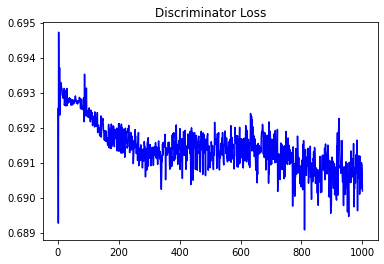

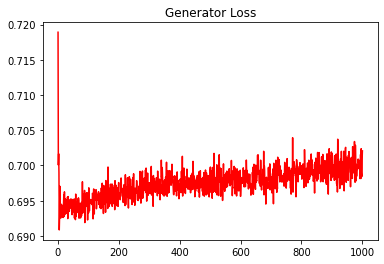

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1066612650582296


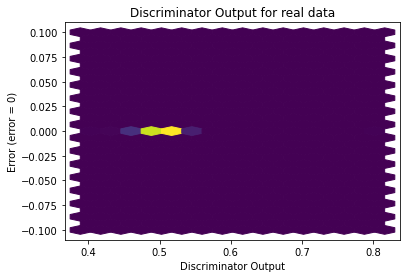

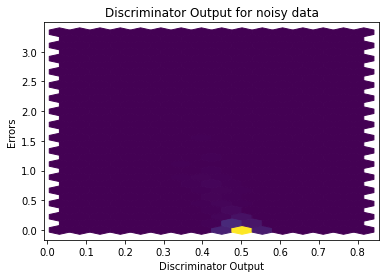

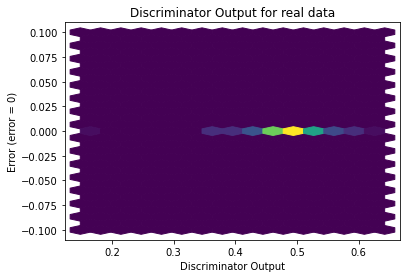

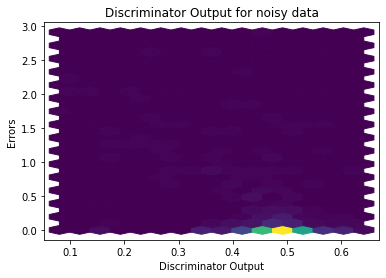

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


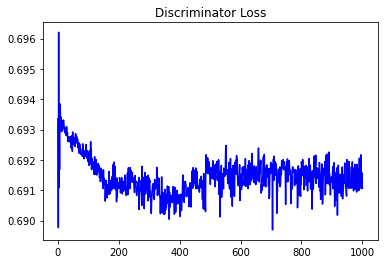

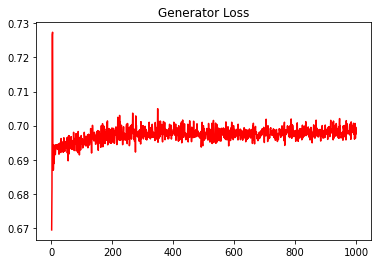

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08881712621762586


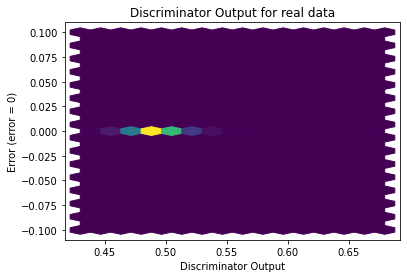

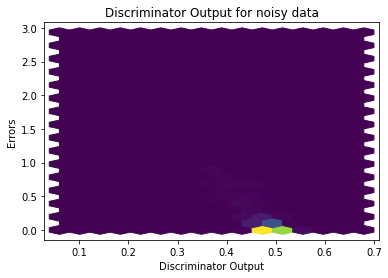

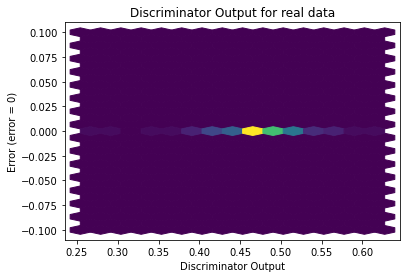

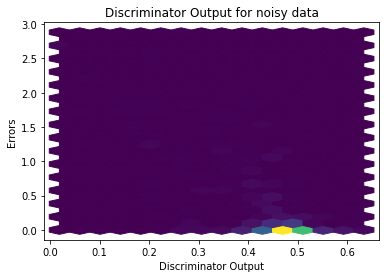

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9954]], requires_grad=True)
